## HR Analytics – Employee Attrition Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import shap
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\AAFALKAZI\OneDrive\Documents\HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape


(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### TARGET VARIABLE ANALYSIS

In [6]:
df['Attrition'].value_counts(normalize=True)*100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

#### Only around 16% employees have left the organization, indicating class imbalance.


### DATA CLEANING

In [7]:
df.drop(['EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)


### FEATURE ENGINEERING

In [8]:
df['IncomeBand'] = pd.cut(
    df['MonthlyIncome'],
    bins=[0,3000,7000,20000],
    labels=['Low','Medium','High']
)


In [9]:
df[['MonthlyIncome','IncomeBand']].head()


,MonthlyIncome,IncomeBand
0,5993,Medium
1,5130,Medium
2,2090,Low
3,2909,Low
4,3468,Medium


In [10]:
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand
0,41,1,2,1102,2,1,2,1,1,2,...,1,0,8,0,1,6,4,0,5,Medium
1,49,0,1,279,1,8,1,1,1,3,...,4,1,10,3,3,10,7,1,7,Medium
2,37,1,2,1373,1,2,2,4,1,4,...,2,0,7,3,3,0,0,0,0,Low
3,33,0,1,1392,1,3,4,1,1,4,...,3,0,8,3,3,8,7,3,0,Low
4,27,0,2,591,1,2,1,3,1,1,...,4,1,6,3,3,2,2,2,2,Medium


### EDA SECTION

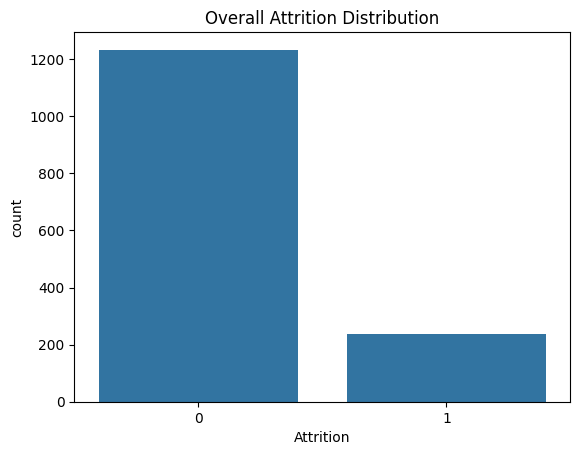

In [11]:
sns.countplot(x='Attrition', data=df)
plt.title("Overall Attrition Distribution")
plt.show()


#### Majority employees stay, but attrition is still significant enough to impact business.


### DEPARTMENT WISE ATTRITION

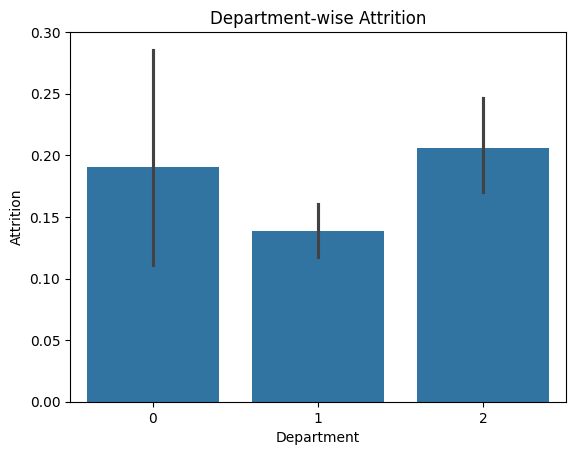

In [12]:
sns.barplot(x='Department', y='Attrition', data=df)
plt.title("Department-wise Attrition")
plt.show()


#### Sales department shows higher attrition compared to R&D and HR.


### SALARY VS ATTRITION

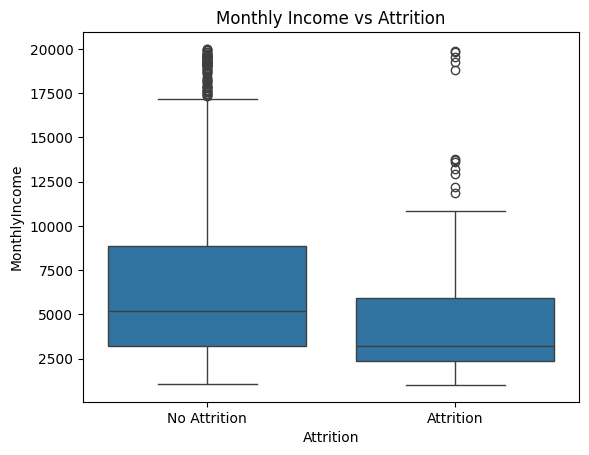

In [13]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.xticks([0,1], ['No Attrition','Attrition'])
plt.title("Monthly Income vs Attrition")
plt.show()


#### Employees with lower monthly income are more likely to leave the organization.


### OVERTIME IMPACT

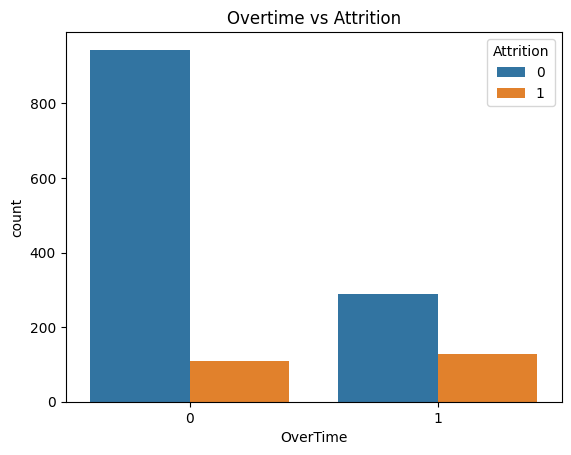

In [14]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Overtime vs Attrition")
plt.show()


#### Employees working overtime have significantly higher attrition.


### EDA Summary
- Attrition is highest in Sales department
- Low income employees show higher resignation rate
- Overtime and poor work-life balance are major attrition drivers
- Promotion gaps increase employee dissatisfaction


### TRAIN TEST SPLIT

In [15]:
df['IncomeBand'] = df['IncomeBand'].cat.codes


In [16]:
df['IncomeBand'].dtype
df['IncomeBand'].unique()


array([1, 0, 2], dtype=int8)

In [17]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7585034013605442
[[186  61]
 [ 10  37]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       247
           1       0.38      0.79      0.51        47

    accuracy                           0.76       294
   macro avg       0.66      0.77      0.68       294
weighted avg       0.86      0.76      0.79       294



#### The numeric features were standardized using StandardScaler. Each value now represents how many standard deviations a data point is from the mean of that feature. This scaling ensures that the  Logistic Regression model converges efficiently and treats all features equally in terms of magnitude.


### SHAP ANALYSIS

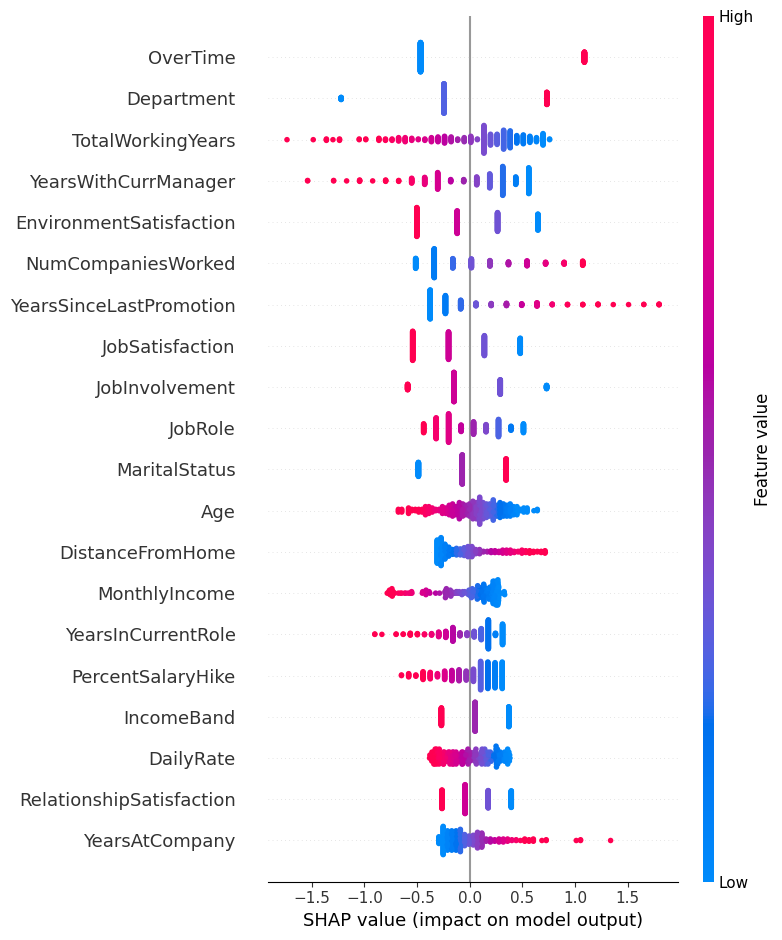

In [19]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X.columns
)

X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X.columns
)

explainer = shap.Explainer(lr, X_train_scaled_df)
shap_values = explainer(X_test_scaled_df)

shap.summary_plot(shap_values, X_test_scaled_df)


#### SHAP analysis shows that employees working overtime with low monthly income and fewer years at the company have a significantly higher probability of attrition, while higher income, job stability, and better work-life balance reduce resignation risk.


In [20]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy*100))


Model Accuracy: 84.01%


C:\Users\AAFALKAZI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


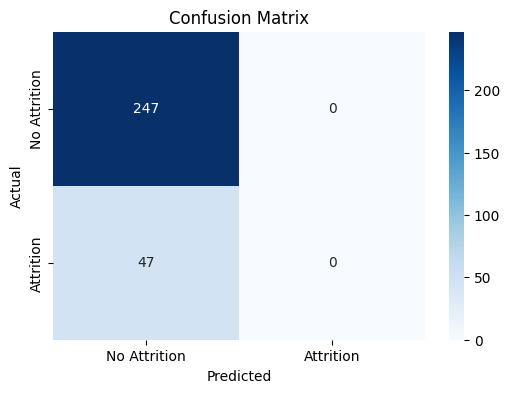

In [21]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition','Attrition'], yticklabels=['No Attrition','Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### The model is biased toward predicting the majority class (No Attrition). While accuracy looks okay, it fails to capture employees at risk, which is the main goal of HR attrition prediction.